In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000891106"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000891106
SIC,6036
Description,"SAVINGS INSTITUTIONS, NOT FEDERALLY CHARTERED"
Name,STERLING FINANCIAL CORP /WA/
Ticker,STSA


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,46.0,1.608500e+01,6.182281e+00,-1.960000e+00,1.447250e+01,1.682000e+01,2.007000e+01,2.304000e+01
interest income,43.0,1.242465e+08,4.320055e+07,5.133700e+07,9.552350e+07,1.059150e+08,1.569825e+08,2.428990e+08
net income,44.0,-1.216898e+07,1.149075e+08,-4.594070e+08,5.312250e+06,1.507150e+07,2.097150e+07,3.208860e+08
net interest income,43.0,7.282802e+07,1.772017e+07,2.772700e+07,6.000250e+07,7.483600e+07,8.385800e+07,1.200050e+08
provision for loan losses,45.0,-2.951700e+07,6.736992e+07,-3.402570e+08,-3.000000e+07,-4.225000e+06,0.000000e+00,1.000000e+07


# Plots

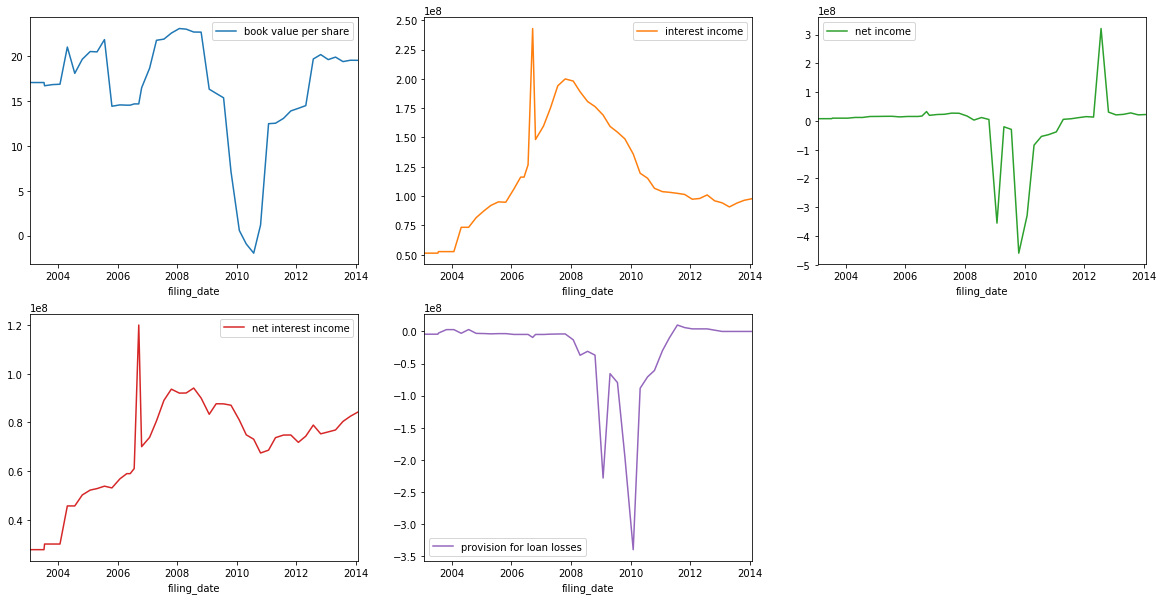

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0000891106 book value per share                            2003Q1    missing   
           interest income                                 2003Q1    missing   
           interest income            2003Q3 to 2003Q4: 2 periods    missing   
           interest income                                 2004Q2    missing   
           interest income                                 2006Q2  duplicate   
           net income                 2003Q3 to 2003Q4: 2 periods    missing   
           net income                                      2004Q2    missing   
           net income                                      2006Q2  duplicate   
           net interest income                             2003Q1    missing   
           net interest income        2003Q3 to 2003Q4: 2 periods    missing   
           net interest income                             2004Q2    missing   
           net interest income                             2006Q2  duplicate   
           provision for loan losses                       2003Q1    missing   
           provision for loan losses                       2003Q4    missing   
           provision for loan losses                       2006Q2  duplicate   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0000891106 book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income              Duplicate period  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income          Duplicate period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()